# BeautifulSoup Module

In [5]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [6]:
class HTMLTableParser:
    def parse_url(self, url):
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "lxml")
        return [(self.parse_html_table(table)) for table in soup.find_all('table')]
    def parse_html_table(self, table):
        n_columns=0
        n_rows=0
        column_names = []

        for row in table.find_all('tr'):

            td_tags = row.find_all('td')
            if len(td_tags)>0:
                n_rows += 1
                if n_columns == 0:
                    n_columns = len(td_tags)

            th_tags = row.find_all('th')
            if len(th_tags)>0 and len(column_names) == 0:
                for th in th_tags:
                    column_names.append(th.get_text())

        if len(column_names)>0 and len(column_names) != n_columns:
            raise Exception("Column titles do not match the number of columns")


        columns = column_names if len(column_names)>0 else range(0, n_columns)
        df=pd.DataFrame(columns=columns,index=range(0,n_rows))
        row_marker = 0

        for row in table.find_all('tr'):
                column_marker = 0
                columns = row.find_all('td')
                for column in columns:
                    df.iat[row_marker, column_marker] = column.get_text()
                    column_marker += 1

                if len(columns)>0:
                    row_marker += 1


        for col in df:
            try:
                if col == 'Rank':
                    continue
                df[col] = df[col].astype(float)


            except ValueError:
                pass

        return df

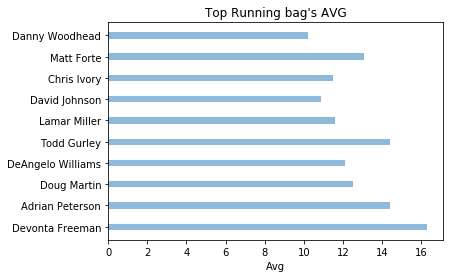

In [7]:
if __name__=='__main__':
    url = "https://www.fantasypros.com/nfl/reports/leaders/rb.php?year=2015"
    
    hp = HTMLTableParser()
    table = hp.parse_url(url)[0].head(10)
    plt.figure()
    
    objects = table['Player'].values
    y_pos = np.arange(len(objects))
    performance = table['Avg'].values

    plt.barh(y_pos, performance, 0.3, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel('Avg')
    plt.title("Top Running bag's AVG")

    plt.show()

In [67]:
table

,Rank,Player,Team,Points,Games,Avg
0,1,Devonta Freeman,ATL,243.9,15.0,16.3
1,2,Adrian Peterson,WAS,230.7,16.0,14.4
2,3,Doug Martin,OAK,199.3,16.0,12.5
3,4,DeAngelo Williams,FA,193.4,16.0,12.1
4,5,Todd Gurley,LAR,187.6,13.0,14.4
5,6,Lamar Miller,HOU,184.9,16.0,11.6
6,7,David Johnson,ARI,173.8,16.0,10.9
7,8,Chris Ivory,BUF,172.7,15.0,11.5
8,9,Matt Forte,FA,170.7,13.0,13.1
9,10,Danny Woodhead,FA,163.1,16.0,10.2


# RE Module

In [668]:
import re

1. 각 단어의 처음 두 문자를 반환해 출력하는 코드를 작성하시오.  
string = “Earth is the third planet from the Sun”

In [153]:
string = "Earth is the third planet from the Sun"
result=re.findall(r'\b\w[^.{2}]',string)
print(result)

['Ea', 'is', 'th', 'th', 'pl', 'fr', 'th', 'Su']


2. 아래에서 email의 도메인을 반환해 출력하는 코드를 작성하시오.  
string = ‘abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz‘

In [32]:
string = "abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz"
result=re.findall(r'@(\w+[.]\w+)',string)

print(result)

['gmail.com', 'test.in', 'analyticsvidhya.com', 'rest.biz']


3. 아래에서 날짜를 반환해 출력하는 코드를 작성하시오.  
string = ‘Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009‘

In [35]:
string = 'Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009'
result = re.findall(r'\d{2}[-]\d{2}[-]\d{4}',string)

print(result)

['12-05-2007', '11-11-2011', '12-01-2009']


4. 아래에서 모음으로 시작하는 모든 단어를 반환해 출력하는 코드를 작성하시오.  
string = “Earth's gravity interacts with other objects in space, especially the Sun and the Moon."

In [669]:
string = "Earth's gravity interacts with other objects in space, especially the Sun and the Moon."
result = re.findall(r'\b[AEIOUaeiou][\w]*',string)

print(result)

['Earth', 'interacts', 'other', 'objects', 'in', 'especially', 'and']


5. 주어진 리스트의 각 요소가 휴대폰 번호라고 할 때, 이 번호들의 유효성을 검사하시오.  
각 요소에 대해 유효성이 맞으면 yes 를 출력 , , 틀리면 no 를 출력하는 코드를 작성하시오.   
(번호는 010 + ‘-’ + 3 자리 or 4 자리 숫자 + ‘-’ + 4자리 숫자로 구성된다고 가정)  
lst = [‘010-256-1354’, ‘010-1234-5576, ‘070-642-0384’, ‘010-290*-4858’, ‘0105734123’]

In [176]:
lst = ['010-256-1354', '010-1234-5576', '070-642-0384', '010-290*-4858', '0105734123']

pat = re.compile('010[-]\d{3,4}[-]\d{4}')


for i in lst:
    print(pat.match(i) !=None, end=', ')

True, True, False, False, False, 

# NLTK Project

In [585]:
import nltk
from nltk.corpus import gutenberg as gu
for file in gu.fileids():
    print(file)

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


In [672]:
from nltk.tokenize import sent_tokenize
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [698]:
shake = ['shakespeare-hamlet.txt','shakespeare-macbeth.txt','shakespeare-caesar.txt']
milton = ['milton-paradise.txt']
austen = ['austen-persuasion.txt']
moby = ['melville-moby_dick.txt']

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")


           
rshake = gu.raw(shake)
rmilton = gu.raw(milton)
rausten = gu.raw(austen)
rmoby = gu.raw(moby)

tshake = tokenizer.tokenize(rshake)
tmilton = tokenizer.tokenize(rmilton)
tausten = tokenizer.tokenize(rausten)
tmoby = tokenizer.tokenize(rmoby)


In [588]:
tmoby=tmoby[:80000]

# stopwords 포함

In [696]:
total_token = tshake+tmilton+tausten+tmoby

In [590]:
fdist = nltk.FreqDist([w.lower() for w in total_token])

In [591]:
df=pd.DataFrame(fdist, index =[0])

In [592]:
df1=df.transpose()

In [593]:
df2=df1.sort_values(by=[0],ascending=False)

In [594]:
df2=df2.head(50)

In [595]:
import itertools

In [596]:
def slice(lst, size):
    it = iter(lst)
    item = list(itertools.islice(it,size))
    while item:
        yield item
        item = list(itertools.islice(it, size))

In [597]:
tlist=list(slice(tshake,5000))
tlist1=list(slice(tmilton,5000))
tlist2=list(slice(tausten,5000))
tlist3=list(slice(tmoby,5000))

In [598]:
top50word=list(df2.index)

In [599]:
def mostFreqFilter(dictionary,filterList):
    lst = []
    for i in filterList:
        lst.append(dictionary.get(i))
    return lst

In [600]:
def freqListWithStopwords(lst):
    return nltk.FreqDist([w.lower() for w in lst])

In [601]:
def makeMatrixWithStop(doc_5000):
    lst2 = []
    for words in (doc_5000):
        lst2.append(mostFreqFilter(freqListWithStopwords(words),top50word))
    dff = pd.DataFrame(lst2)
    dff.columns = top50word
    dff.fillna(0,inplace=True)
    average = [w for w in [dff[i].mean() for i in top50word]]
    std = [w for w in [dff[i].std() for i in top50word]]
    dff.loc[len(dff)] = average
    dff.loc[len(dff)] = std
    return dff

In [602]:
shake=makeMatrixWithStop(tlist)
milton=makeMatrixWithStop(tlist1)
austen=makeMatrixWithStop(tlist2)
moby=makeMatrixWithStop(tlist3)

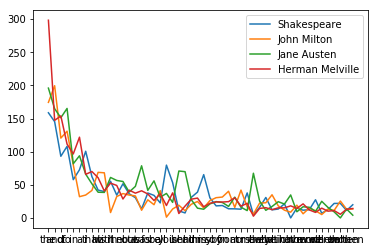

In [603]:
plt.plot(shake.iloc[-2],label='Shakespeare')
plt.plot(milton.iloc[-2],label='John Milton')
plt.plot(austen.iloc[-2],label='Jane Austen')
plt.plot(moby.iloc[-2],label='Herman Melville')
plt.legend()
plt.show()

# stopwords 미포함

In [639]:
from nltk.corpus import stopwords
english_stops =set(stopwords.words('english'))

In [700]:
total_token_s=[w.lower()for w in total_token]

In [702]:
total_token1=[word for word in total_token_s if word not in english_stops]

In [703]:
fdist1 = nltk.FreqDist([w.lower() for w in total_token1])

In [704]:
dfm=pd.DataFrame(fdist1, index =[0])

In [705]:
dfm1=dfm.transpose()
dfm2=dfm1.sort_values(by=[0],ascending=False)

In [707]:
dfm2=dfm2.head(50)

In [708]:
top50word_m=list(dfm2.index)

In [710]:
def mostFreqFilter(dictionary,filterList):
    lst = []
    for i in filterList:
        lst.append(dictionary.get(i))
    return lst

In [711]:
def freqListWithStopwords(lst):
    return nltk.FreqDist([w.lower() for w in lst])

In [712]:
def makeMatrixWithStop_m(doc_5000):
    lst2 = []
    for words in (doc_5000):
        lst2.append(mostFreqFilter(freqListWithStopwords(words),top50word_m))
    dff = pd.DataFrame(lst2)
    dff.columns = top50word_m
    dff.fillna(0,inplace=True)
    average = [w for w in [dff[i].mean() for i in top50word_m]]
    std = [w for w in [dff[i].std() for i in top50word_m]]
    dff.loc[len(dff)] = average
    dff.loc[len(dff)] = std
    return dff

In [713]:
shake1=makeMatrixWithStop_m(tlist)
milton1=makeMatrixWithStop_m(tlist1)
austen1=makeMatrixWithStop_m(tlist2)
moby1=makeMatrixWithStop_m(tlist3)

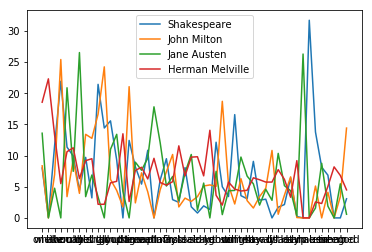

In [714]:
plt.plot(shake1.iloc[-2],label='Shakespeare')
plt.plot(milton1.iloc[-2],label='John Milton')
plt.plot(austen1.iloc[-2],label='Jane Austen')
plt.plot(moby1.iloc[-2],label='Herman Melville')
plt.legend()
plt.show()